# Project2OfMachineLearning

Importing the necessary libraries

In [42]:
import pandas as pd
import numpy as np
import warnings
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')


In [43]:
#Loading the dataset from downloads which is already saved on the system.
df=pd.read_csv("insurance.csv")
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [3]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
df.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [5]:
df.shape

(1338, 7)

This dataset contains 1338 rows and 7 columns.

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The dataset has 3 types of data types, integer, object and float.
Here we can observe that the last column (charges) is the dependent variable and it is of float data type. So this can be
considered a regression problem. Also it is dependent on the other variables such as age, sex, children, BMI, smoker and region.

In [7]:
df.columns #(keys)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Independent variables/input/explanatory variables: Age, sex, BMI, children, smoker, region.
Dependent variable/output/lable/target variable:Charges

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

So, from here, we can conclude that there are no missing values in the entire dataset and we can proceed further from here.

<AxesSubplot:>

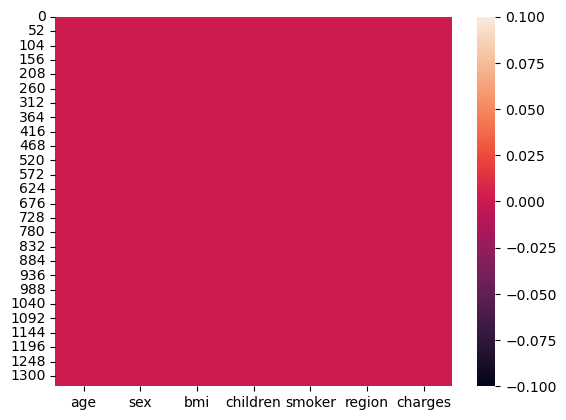

In [10]:
sns.heatmap(df.isnull())

The heatmap is of uniform color, which indicates that there are no missing values. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The above description shows that there are 6 columns which are not null and sex and smoker and region are of 
object type, which later will be converted to numeric values. 
The memory usage is 73.3+KB. 

In [12]:
df.nunique().to_frame("No: of unique values")

No: of unique values
age                         47
sex                          2
bmi                        548
children                     6
smoker                       2
region                       4
charges                   1337

In [13]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [14]:
df['charges'].nunique()

1337

The total number of unique values is 1337 in target and total number of rows is 1338, so it is a regression=based problem.

In [15]:
#Now, we can check the value_counts of each column separately using the loop.
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

From the above, we can see the value_counts of each value in different columns. Also there are no whitespaces or Nan values 
either.
Age ranges from 18 to 64 with respective counts. Male and female are 676 and 662 respectively. Smokers are 1064 and nonsmokers 
274. Regions are of 4 types with counts noted above. Charges is the target, which has a lenght of 1337 which has almost unique
values except 2 counts which are similar.


# Statistical Summary

In [16]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

There are no negative values.

1.  Count shows that all the counts are equal, which means there are no missing values in any columns.
2.  Mean is greater than median in all the columns (very minor changes, right skewed), otherwise almost normal distribution
in the independent variables.
3.  If we compare the max values and the 75th percentile, we can see differences in all the columns. Hence, outliers are present
in the dataset, which needs to be removed.
4. Standard deviation is also noted to be high in the columns except in children's column.

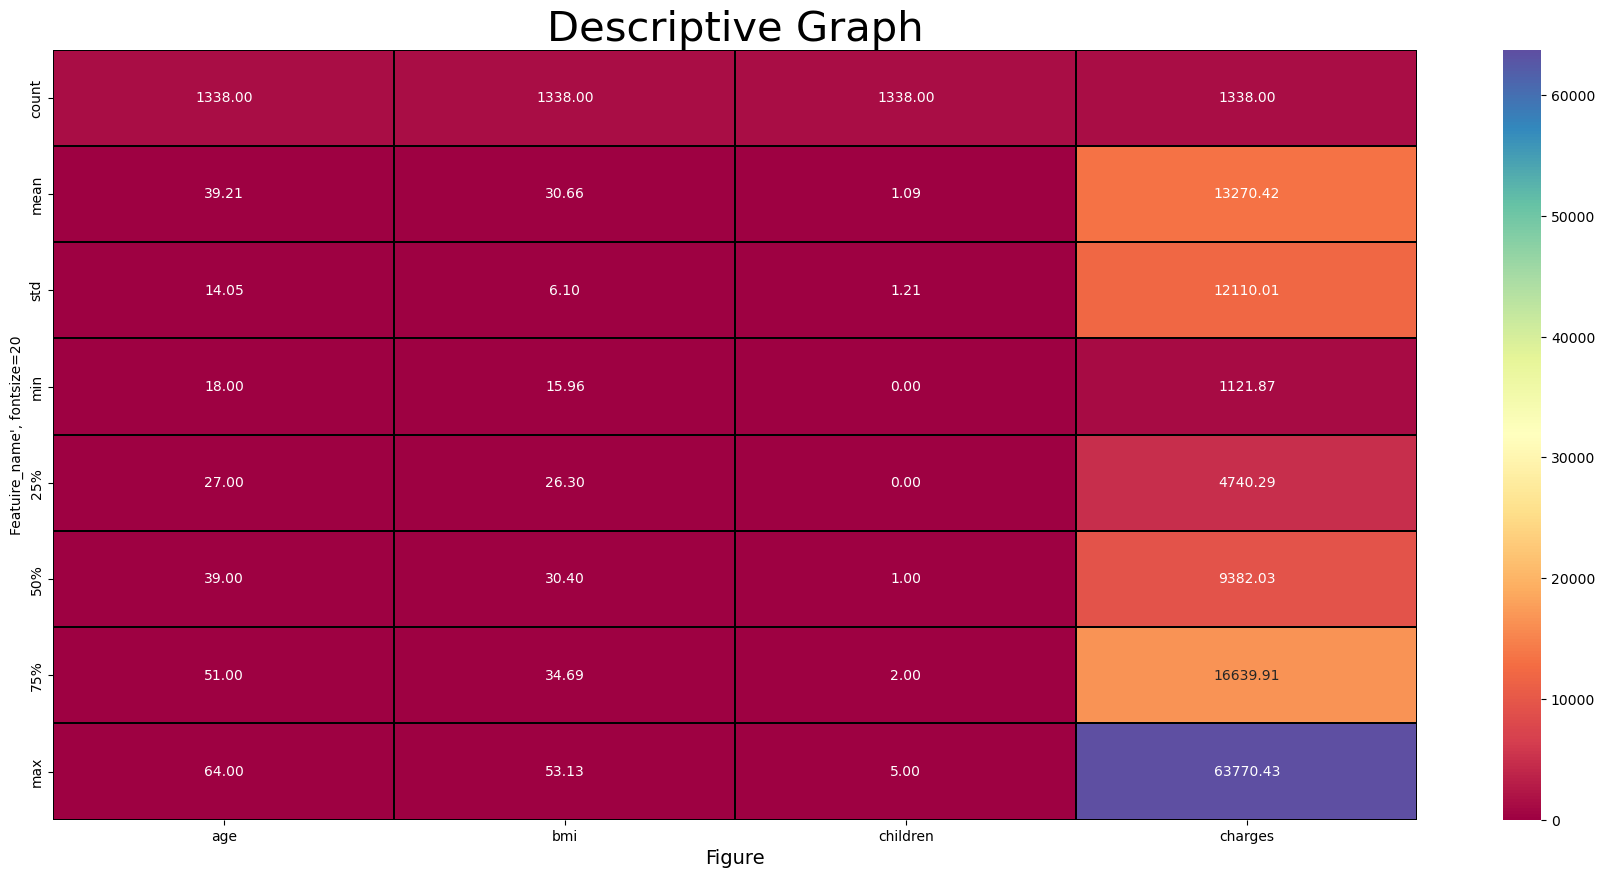

In [17]:
plt.figure(figsize=(22, 10))
sns.heatmap(df.describe(), annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure', fontsize=14)
plt.ylabel("Featuire_name', fontsize=20")
plt.title("Descriptive Graph", fontsize=30)
plt.show()


In [18]:
#checking categorical values
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:", categorical_col)
    

Categorical columns: ['sex', 'smoker', 'region']


In [19]:
#checking numberical values
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:", numerical_col)

Numerical columns: ['age', 'bmi', 'children', 'charges']


# EXPLORATORY DATA ANALYSIS(on numerical data)

# Univariate Analysis(only one column with target)

In [20]:
a=df.columns

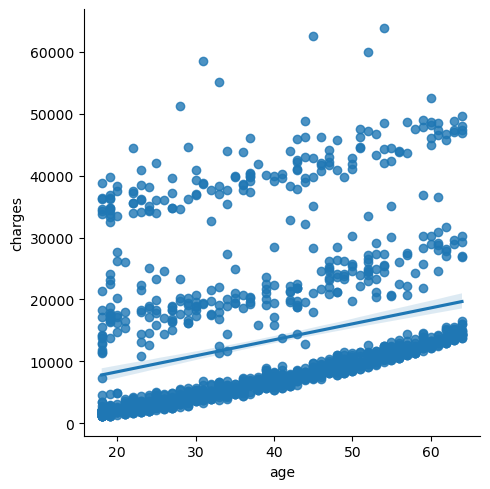

In [21]:
sns.lmplot(x='age', y='charges', data=df, palette='colorblind')

Here, we can note that the bestfit line has just few datapoints and the data is precise but not gathered around bestfit line.
There is a positive correlation but not a strong one.

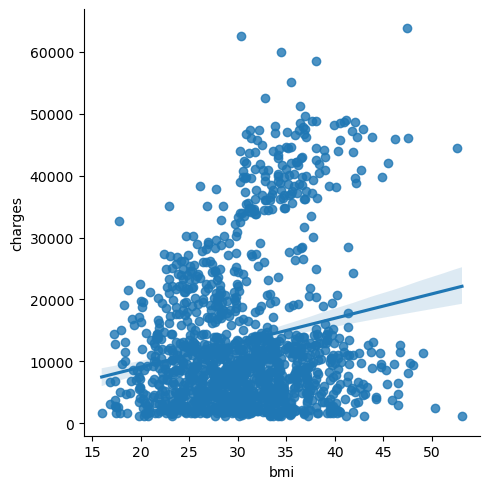

In [22]:
sns.lmplot(x='bmi', y='charges', data=df, palette='M')

Here, it is a positive correlation, most data points are gathered together, but again not all points on the bestfit line.

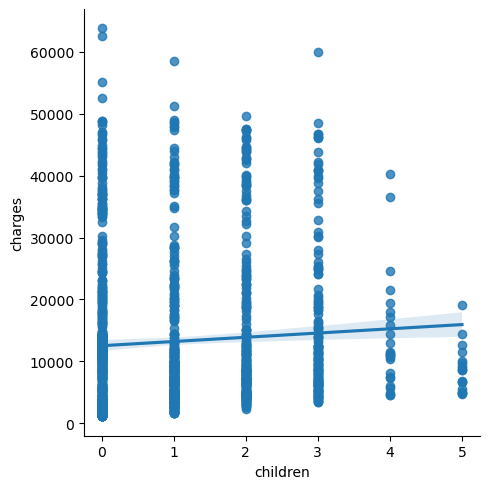

In [23]:
sns.lmplot(x='children', y='charges', data=df, palette='colorblind')

There is a positive correlation but not many datapoints passing through the bestfit line.  

There is a positive correlation but not not highly correlated as most datapoints are not passing through the bestfit line.

Analysis using the regplot

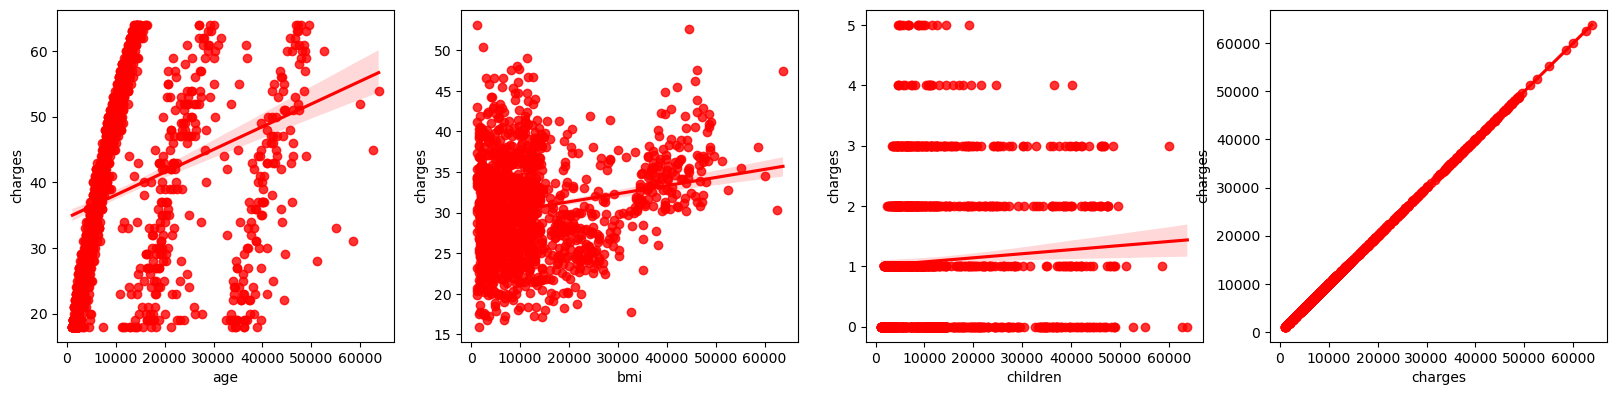

In [24]:
plt.figure(figsize=(20, 25))
p=1
for i in numerical_col:
    if p<=7:
        plt.subplot(5,4,p)
        sns.regplot(x='charges',y = i, data=df, color='r')
        plt.xlabel(i)
        plt.ylabel('charges')
    p+=1
plt.show()

# Pairplot: Pairwise bivariate analysis

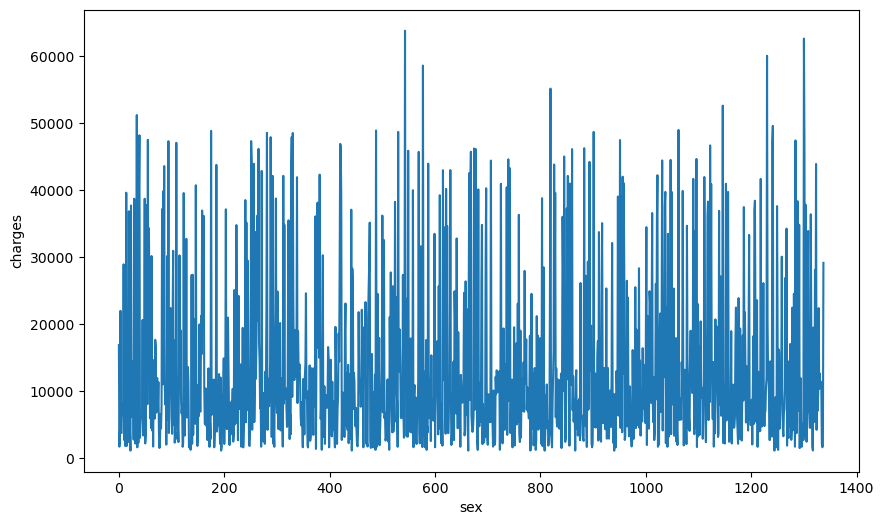

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(df.charges, label='region')
plt.ylabel("charges")
plt.xlabel("sex")
plt.show()

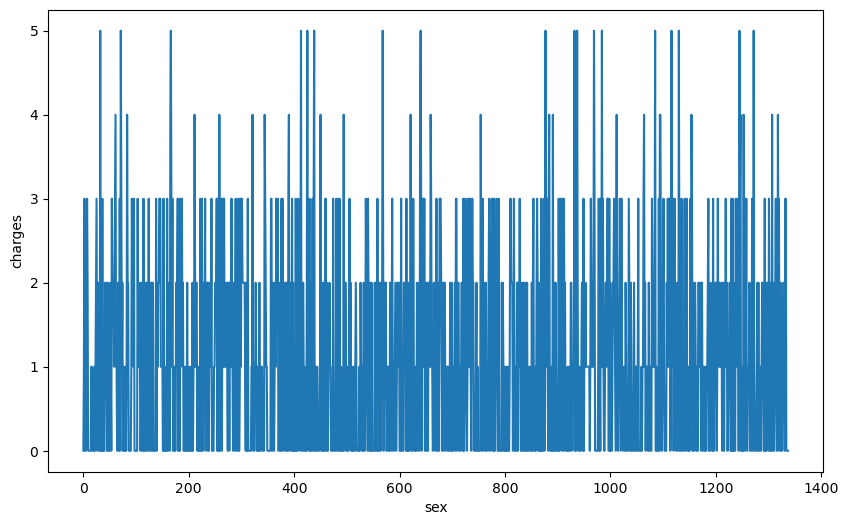

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df.children, label='charges')
plt.ylabel("charges")
plt.xlabel("sex")
plt.show()

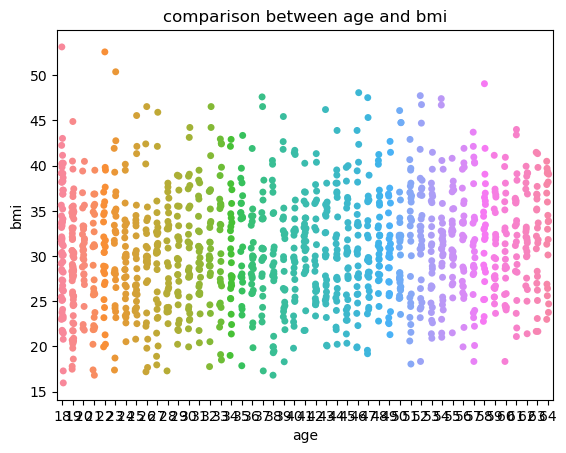

In [27]:
plt.title("comparison between age and bmi")
sns.stripplot(x='age', y='bmi', data=df)
plt.show()

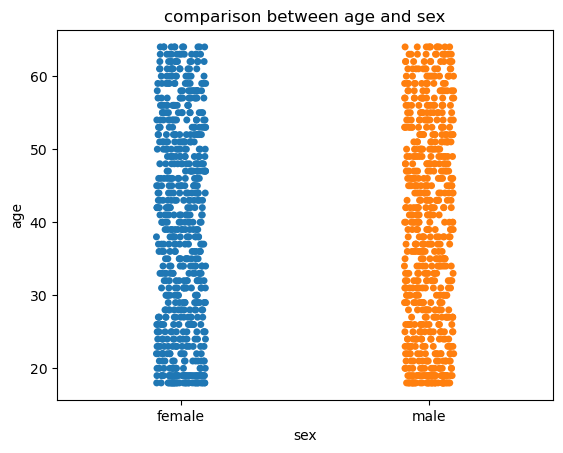

In [28]:
plt.title("comparison between age and sex")
sns.stripplot(x='sex', y='age', data=df)
plt.show()

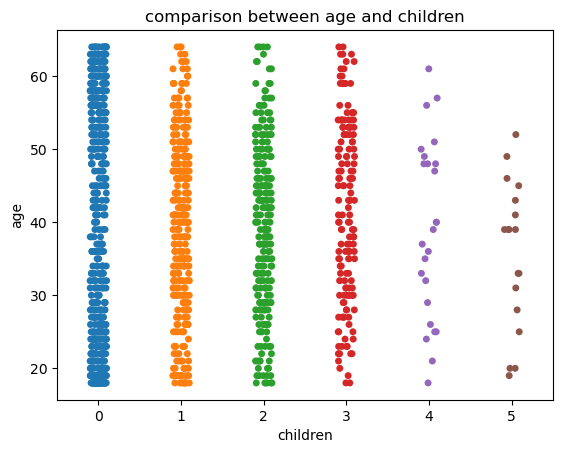

In [29]:
plt.title("comparison between age and children")
sns.stripplot(x='children', y='age', data=df)
plt.show()

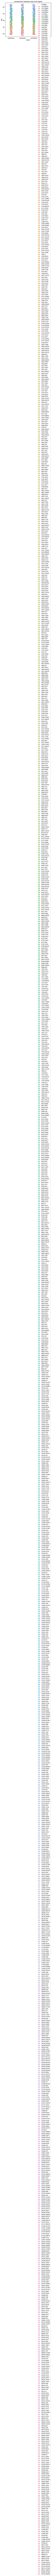

In [30]:
plt.title("comparison between age and region")
sns.stripplot(x='region', y='age', data=df, hue='charges')
plt.show()

age            AxesSubplot(0.125,0.53;0.0945122x0.35)
bmi         AxesSubplot(0.238415,0.53;0.0945122x0.35)
children    AxesSubplot(0.351829,0.53;0.0945122x0.35)
charges     AxesSubplot(0.465244,0.53;0.0945122x0.35)
dtype: object

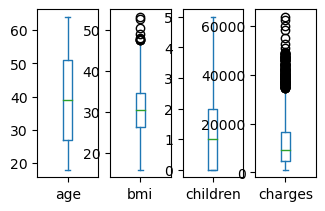

In [31]:
df.plot(kind='box' , subplots=True, layout=(2,7))

We can detect outliers only from numerical data, hence we have age, bmi, children and charges.

There are no outliers present in the age column.
The BMI column has few outliers.
Children column again has no outliers.
We do not need to remove outliers from the target or charges but in order that we get the data to be uniform rows,
we have to apply Z score on that also.

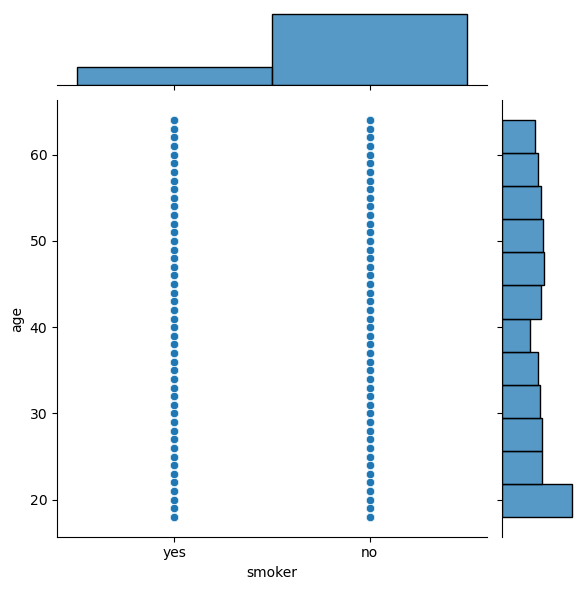

In [32]:
sns.jointplot(data=df, x='smoker', y='age')

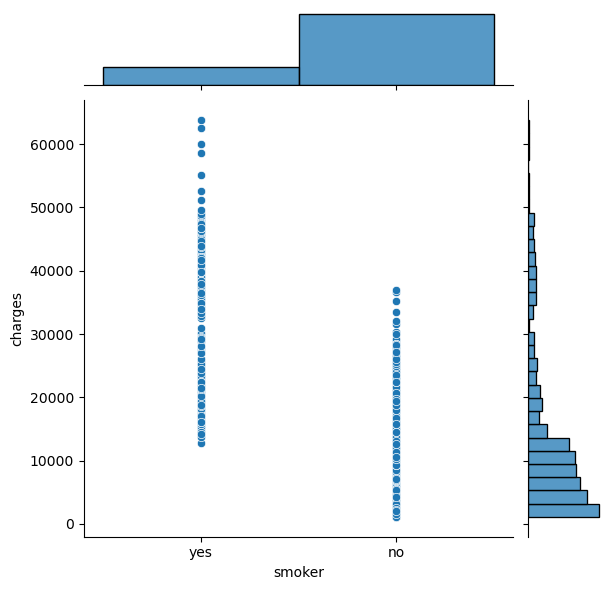

In [33]:
sns.jointplot(data=df, x='smoker', y='charges')

male      676
female    662
Name: sex, dtype: int64


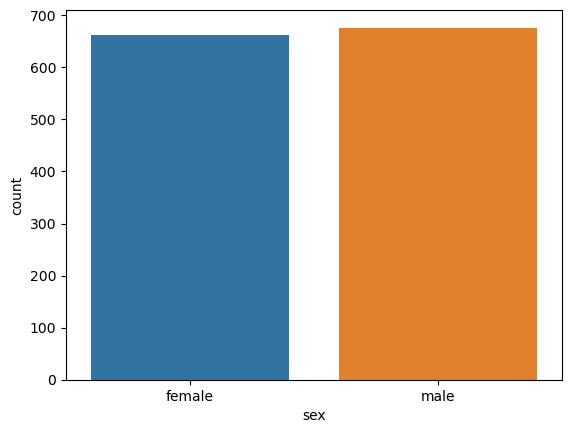

In [34]:
sns.countplot(x='sex', data=df)
print(df['sex'].value_counts())
plt.show()

From here, we can see that both male and females have almost the same count except for minor difference. So both contribute 
equally to the target.

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


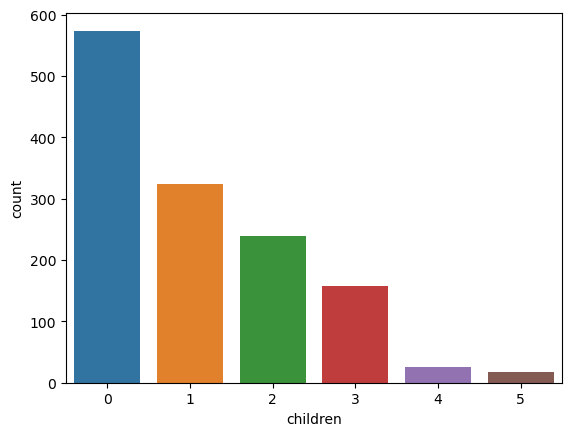

In [35]:
sns.countplot(x='children', data=df)
print(df['children'].value_counts())
plt.show()

As the age of the children increases, the count increase, so this variable contributes positively to the target.

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


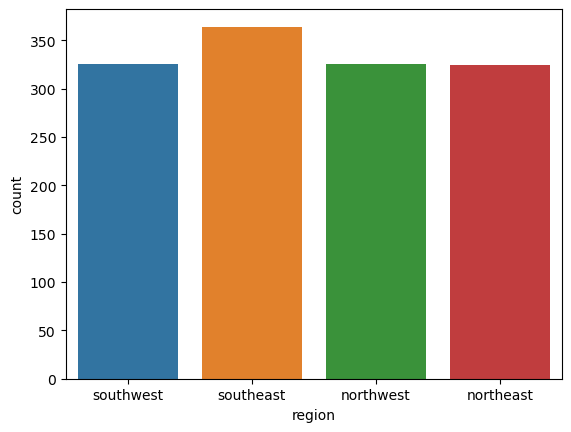

In [36]:
sns.countplot(x='region', data=df)
print(df['region'].value_counts())
plt.show()

In [37]:
Here, we can see that regions have almost same value.

SyntaxError: invalid syntax (718267092.py, line 1)

In [ ]:
sns.countplot(x='age', data=df)
plt.show()

In [ ]:
From here, we notice that the graph is right skewd.

In [ ]:
sns.countplot(x='bmi', data=df)
plt.show()

In [ ]:
The graph here is suggesting normal pattern

In [ ]:
plt.figure(figsize=(20, 25))
p=1
for i in df:
    if p<=13:
        plt.subplots(5, 4 , p)
        sns.scatterplot(x='charges', y=i, data=df, color='b')
        plt.xlabel('charges')
        plt.ylabel(i)
    p+=1
plt.show()

In [44]:
#to remove outliers, we need to calculate z score; zcore=(+/-)3
from scipy.stats import zscore

In [45]:
out_features=df[['age', 'bmi', 'children' ]]

In [46]:
z=np.abs(zscore(out_features))

In [47]:
z

age       bmi  children
0     1.438764  0.453320  0.908614
1     1.509965  0.509621  0.078767
2     0.797954  0.383307  1.580926
3     0.441948  1.305531  0.908614
4     0.513149  0.292556  0.908614
...        ...       ...       ...
1333  0.768473  0.050297  1.580926
1334  1.509965  0.206139  0.908614
1335  1.509965  1.014878  0.908614
1336  1.296362  0.797813  0.908614
1337  1.551686  0.261388  0.908614

[1338 rows x 3 columns]

In [48]:
np.where(z>3)

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
         932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
       dtype=int64),
 array([2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1],
       dtype=int64))

In [49]:
z.iloc[32, 2]

3.240618711442044

In [50]:
z.iloc[1317, 1]

3.685522232281654

In [51]:
z.iloc[413, 2]

3.240618711442044

In the above cases we can see the z score is above 3, which is above threshold value of 3.

Therefore, we can remove all the valuse of z>3 and consider z<3

In [52]:
df1=df[(z<3).all(axis=1)]


In [53]:
df1.shape

(1316, 7)

we can note that before applying zscore the rows were 1338 and now the new dataset contains 1316 rows. Reduction in the rows.

In [54]:
print("The old dataframe is:", df.shape[0])
print("The new dataframe is:", df1.shape[0])

The old dataframe is: 1338
The new dataframe is: 1316


In [55]:
print("Dataloss percentage:", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Dataloss percentage: 1.6442451420029895


There is 1.6% dataloss. 

In [56]:
df=df1

# Checking skewness

ValueError: could not convert string to float: 'female'

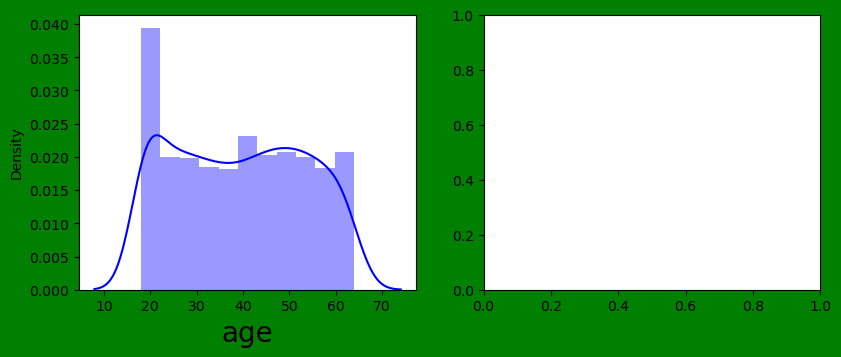

In [57]:
plt.figure (figsize=(20, 25), facecolor='green')
plotnumber=1
for column in df:
    if plotnumber<=18:
        ax=plt.subplot(6,4, plotnumber)
        sns.distplot(df[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()


In [60]:
df.skew()

age         0.049904
bmi         0.193564
children    0.740881
charges     1.501055
dtype: float64

In [61]:
#Here we can see that skewness is present in children's column.
df['children']=np.cbrt(df['children'])

In [62]:
df['children']

0       0.00000
1       1.00000
2       1.44225
3       0.00000
4       0.00000
         ...   
1333    1.44225
1334    0.00000
1335    0.00000
1336    0.00000
1337    0.00000
Name: children, Length: 1316, dtype: float64

<AxesSubplot:xlabel='children', ylabel='Density'>

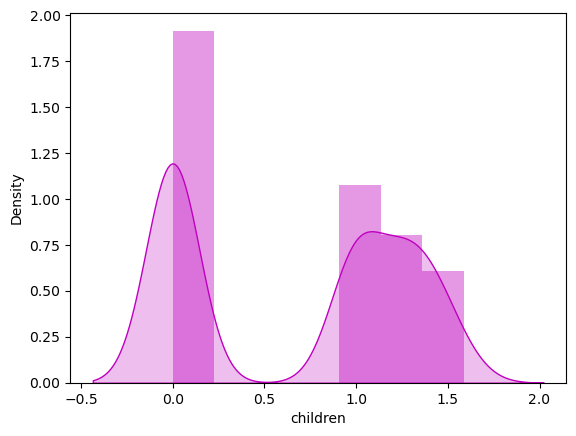

In [63]:
sns.distplot(df['children'], color='m', kde_kws={"shade":True}, hist='false')

The sknewness is reduced.

In [64]:
df.corr()

age       bmi  children   charges
age       1.000000  0.119062  0.056962  0.299554
bmi       0.119062  1.000000  0.024359  0.203195
children  0.056962  0.024359  1.000000  0.081491
charges   0.299554  0.203195  0.081491  1.000000

The values are below 1 which are acceptable.

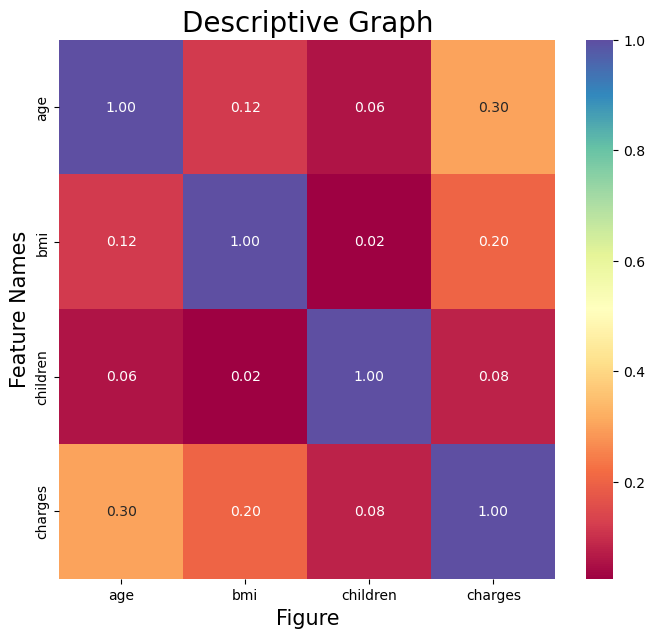

In [65]:
corr_hmap=df.corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corr_hmap, annot=True, fmt='0.2f', cmap='Spectral')
plt.xlabel("Figure", fontsize=15)
plt.ylabel("Feature Names", fontsize=15)
plt.title("Descriptive Graph", fontsize=20)
plt.show()

In [66]:
df.corr().charges.sort_values()

children    0.081491
bmi         0.203195
age         0.299554
charges     1.000000
Name: charges, dtype: float64

In [67]:
x=df.iloc[:,0:-1]
x

age     sex     bmi  children smoker     region
0      19  female  27.900   0.00000    yes  southwest
1      18    male  33.770   1.00000     no  southeast
2      28    male  33.000   1.44225     no  southeast
3      33    male  22.705   0.00000     no  northwest
4      32    male  28.880   0.00000     no  northwest
...   ...     ...     ...       ...    ...        ...
1333   50    male  30.970   1.44225     no  northwest
1334   18  female  31.920   0.00000     no  northeast
1335   18  female  36.850   0.00000     no  southeast
1336   21  female  25.800   0.00000     no  southwest
1337   61  female  29.070   0.00000    yes  northwest

[1316 rows x 6 columns]

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [69]:
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])


In [70]:
df

age  sex     bmi  children  smoker  region      charges
0      19    0  27.900   0.00000       1       3  16884.92400
1      18    1  33.770   1.00000       0       2   1725.55230
2      28    1  33.000   1.44225       0       2   4449.46200
3      33    1  22.705   0.00000       0       1  21984.47061
4      32    1  28.880   0.00000       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970   1.44225       0       1  10600.54830
1334   18    0  31.920   0.00000       0       0   2205.98080
1335   18    0  36.850   0.00000       0       2   1629.83350
1336   21    0  25.800   0.00000       0       3   2007.94500
1337   61    0  29.070   0.00000       1       1  29141.36030

[1316 rows x 7 columns]

In [71]:
x=df.iloc[:,0:-1]
x

age  sex     bmi  children  smoker  region
0      19    0  27.900   0.00000       1       3
1      18    1  33.770   1.00000       0       2
2      28    1  33.000   1.44225       0       2
3      33    1  22.705   0.00000       0       1
4      32    1  28.880   0.00000       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970   1.44225       0       1
1334   18    0  31.920   0.00000       0       0
1335   18    0  36.850   0.00000       0       2
1336   21    0  25.800   0.00000       0       3
1337   61    0  29.070   0.00000       1       1

[1316 rows x 6 columns]

In [72]:
y=df.iloc[:,-1]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1316, dtype: float64

In [73]:
st=StandardScaler() #scaling applied and we can see the uniformity in the values
x=pd.DataFrame(st.fit_transform(x))

In [74]:
x

0         1         2         3         4         5
0    -1.441444 -1.006098 -0.453768 -1.108972  1.959141  1.352089
1    -1.512509  0.993939  0.527239  0.529892 -0.510428  0.446568
2    -0.801858  0.993939  0.398555  1.254679 -0.510428  0.446568
3    -0.446533  0.993939 -1.321967 -1.108972 -0.510428 -0.458954
4    -0.517598  0.993939 -0.289988 -1.108972 -0.510428 -0.458954
...        ...       ...       ...       ...       ...       ...
1311  0.761574  0.993939  0.059297  1.254679 -0.510428 -0.458954
1312 -1.512509 -1.006098  0.218063 -1.108972 -0.510428 -1.364475
1313 -1.512509 -1.006098  1.041975 -1.108972 -0.510428  0.446568
1314 -1.299314 -1.006098 -0.804724 -1.108972 -0.510428  1.352089
1315  1.543290 -1.006098 -0.258235 -1.108972  1.959141 -0.458954

[1316 rows x 6 columns]

# Modelling the dataset

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
#Train, test and split method
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.33, random_state=42)


In [77]:
x_train.shape


(881, 6)

In [78]:
y_train.shape


(881,)

In [79]:
x_test.shape


(435, 6)

In [80]:
y_test.shape

(435,)

In [81]:
lr=LinearRegression()

In [82]:
lr.fit(x_train, y_train)

LinearRegression()

In [83]:
pred_lr=lr.predict(x_test)
print("Medical charges: ", pred_lr)
print("actual charges", y_test)

Medical charges:  [11327.10202456  3184.06665052 27085.42628247  3014.64538132
  9205.52815653 11937.61900014  8641.05368316  2815.41003439
  7330.48552649  4063.13205751  5624.97721412 12497.92672909
 11746.9008936  11799.64505941 12633.7170423  12713.71525974
  5468.0192355  13352.68886494 24424.15843955  4232.22721845
  5398.15595341  5825.74224893 32920.30628539 13765.80718404
 15972.61678206 12400.70970107  8341.04380887  5447.12807573
 10960.27239708 12184.48647695 14349.06591912  9702.25584655
  2121.55645882 10068.96320748  8855.49859157  2569.14232567
  8840.43138605 14073.40537197  4557.19340525  3830.12471627
 37766.98506578  4528.16408832  7822.04340311 16546.82153328
 37937.02748638 14662.15398704  4974.55539346 11546.7147182
 12098.43526582 14834.87253568   367.77257325  4536.76320157
 10491.76327931  6868.33083247 13660.55485504  8922.95402711
 36711.61253252 26344.70406646 34145.89357803 34565.60754172
  3771.84885957 28610.96028458 38499.79926086  6258.0781742
  8630.4

In [84]:
print(r2_score(y_test, pred_lr))

0.778593677126184


In [85]:
print("Error:")
print("Mean squared error:", mean_squared_error(y_test, pred_lr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_lr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_lr)))
      

Error:
Mean squared error: 35711283.20545332
Mean_absolute_error 4206.083742753187
Root_mean_Squared_error: 5975.891833480031


In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR


In [90]:
rfr=RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr=rfr.predict(x_test) 
pred_train=rfr.predict(x_train)
print('R2_score', r2_score(y_test, pred_rfr))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_rfr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_rfr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_rfr)))
      

R2_score 0.8554352429544502
R2_score on training data 97.61014976158184
Mean squared error: 23317278.898685522
Mean_absolute_error 2768.4168199595824
Root_mean_Squared_error: 4828.796837586515


In [91]:
knn=KNN()
knn.fit(x_train, y_train)
pred_knn=rfr.predict(x_test) 
pred_train=knn.predict(x_train)
print('R2_score', r2_score(y_test, pred_knn))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_knn))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_knn))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_knn)))
      

R2_score 0.8554352429544502
R2_score on training data 85.71808414900005
Mean squared error: 23317278.898685522
Mean_absolute_error 2768.4168199595824
Root_mean_Squared_error: 4828.796837586515


In [92]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train, y_train)
pred_dtc=dtc.predict(x_test) 
pred_train=dtc.predict(x_train)
print('R2_score', r2_score(y_test, pred_dtc))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_dtc))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_dtc))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_dtc)))
      

R2_score 0.7341268172036561
R2_score on training data 99.85190474812799
Mean squared error: 42883475.07124583
Mean_absolute_error 2991.9375164367816
Root_mean_Squared_error: 6548.547554324228


In [93]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred_gbr=dtc.predict(x_test) 
pred_train=dtc.predict(x_train)
print('R2_score', r2_score(y_test, pred_gbr))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_gbr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_gbr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_gbr)))
      

R2_score 0.7341268172036561
R2_score on training data 99.85190474812799
Mean squared error: 42883475.07124583
Mean_absolute_error 2991.9375164367816
Root_mean_Squared_error: 6548.547554324228


In [94]:
la=Lasso()
la.fit(x_train, y_train)
pred_la=la.predict(x_test) 
pred_train=la.predict(x_train)
print('R2_score', r2_score(y_test, pred_la))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_la))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_la))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_la)))
      

R2_score 0.7785833286686856
R2_score on training data 73.37083901213583
Mean squared error: 35712952.338889375
Mean_absolute_error 4206.109857333572
Root_mean_Squared_error: 5976.031487441258


In [95]:
rd=Ridge()
rd.fit(x_train, y_train)
pred_rd=rd.predict(x_test) 
pred_train=rd.predict(x_train)
print('R2_score', r2_score(y_test, pred_rd))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_rd))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_rd))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_rd)))
      

R2_score 0.7785366068786963
R2_score on training data 73.3707385121646
Mean squared error: 35720488.23512088
Mean_absolute_error 4208.385660839569
Root_mean_Squared_error: 5976.661964267419


In [96]:
svr=SVR()
svr.fit(x_train, y_train)
pred_svr=svr.predict(x_test) 
pred_train=dtc.predict(x_train)
print('R2_score', r2_score(y_test, pred_svr))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_svr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_svr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_svr)))
      

R2_score -0.1407681149362372
R2_score on training data 99.85190474812799
Mean squared error: 183997876.37255815
Mean_absolute_error 8897.250546152603
Root_mean_Squared_error: 13564.581688078631


# Cross-Validation_score()

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
score=cross_val_score(lr, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_lr)-score.mean())*100)

[0.76088507 0.70802256 0.77839027 0.72658798 0.75951637]
0.7466804475812147
Difference between R2 Score and cross validation score is: 3.1913229544969335


In [99]:
score1=cross_val_score(rfr, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_rfr)-score.mean())*100)

[0.76088507 0.70802256 0.77839027 0.72658798 0.75951637]
0.7466804475812147
Difference between R2 Score and cross validation score is: 10.875479537323551


In [100]:
score2=cross_val_score(knn, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_knn)-score.mean())*100)

[0.76088507 0.70802256 0.77839027 0.72658798 0.75951637]
0.7466804475812147
Difference between R2 Score and cross validation score is: 10.875479537323551


In [101]:
score3=cross_val_score(rfr, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is -", (r2_score(y_test, pred_rfr)-score.mean())*100)

[0.76088507 0.70802256 0.77839027 0.72658798 0.75951637]
0.7466804475812147
Difference between R2 Score and cross validation score is - 10.875479537323551


In [102]:
score4=cross_val_score(dtc, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_dtc)-score.mean())*100)

[0.76088507 0.70802256 0.77839027 0.72658798 0.75951637]
0.7466804475812147
Difference between R2 Score and cross validation score is: -1.2553630377558522


In [103]:
score5=cross_val_score(gbr, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_gbr)-score.mean())*100)

[0.76088507 0.70802256 0.77839027 0.72658798 0.75951637]
0.7466804475812147
Difference between R2 Score and cross validation score is: -1.2553630377558522


In [104]:
score6=cross_val_score(la, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_la)-score.mean())*100)

[0.76088507 0.70802256 0.77839027 0.72658798 0.75951637]
0.7466804475812147
Difference between R2 Score and cross validation score is: 3.190288108747097


In [105]:
score7=cross_val_score(rd, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_rd)-score.mean())*100)

[0.76088507 0.70802256 0.77839027 0.72658798 0.75951637]
0.7466804475812147
Difference between R2 Score and cross validation score is: 3.1856159297481645


In [106]:
score8=cross_val_score(svr, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_svr)-score.mean())*100)

[0.76088507 0.70802256 0.77839027 0.72658798 0.75951637]
0.7466804475812147
Difference between R2 Score and cross validation score is: -88.74485625174519


# Hyperparameter Tuning
#GridSearchCV

In [116]:
from sklearn.model_selection import GridSearchCV
param={'alpha':[1.0, 0.5, .4, 2], 'fit intercept':[True, False], 'Solver':['auto', 'Svd', 'cholesky', 'Isqr', 'saga', 'lbfgs'],
       'positive':[False, True], 'random_state':[1,4,10, 20]}


In [120]:
GCV.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [114]:
GCV=GridSearchCV(RandomForestRegressor(), param, cv=5)

In [115]:
GCV.fit(x_train, y_train)

ValueError: Invalid parameter Solver for estimator RandomForestRegressor(). Check the list of available parameters with `estimator.get_params().keys()`.

In [121]:
Model=RandomForestRegressor(alpha=0.05, fit_intercept=True, positive=False, random_state=1, Solver='auto')
Model.fit(x_train, y_train)
pred=Model.predict(x_test)
print('R2_score', r2_score(y_test, pred))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred))
print("Mean_absolute_error", mean_absolute_error(y_test, pred))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred)))      

TypeError: __init__() got an unexpected keyword argument 'alpha'

In [ ]:
import pickle
filename='InsuranceCost.pkl'
pickle.dump(Final_model, open(filename, 'wb'))

In [ ]:
import pickle
loaded_Final_model=pickle.load( open('InsuracneCost.pkl', 'rb'))
result=loaded_Final_model.score(x_test, y_test)                               
print(result*100)

In [ ]:
Conclusion=pd.DataFrame([loaded_Model.predict(x_test)[:],y_test[:]], index=["predicted", "original"])
Conclusion                                                                              